In [2]:
from alphaflow import Node, make_node
import math

In [3]:
class Factorial(Node):
    @make_node
    def __init__(self, n, **kwargs):
        super().__init__()
        self.n = n


    def evaluate(self):
        return math.factorial(self.n)

    
class Add(Node):
    @make_node
    def __init__(self, a, b, **kwargs):
        super().__init__()
        self.a = a
        self.b = b


    def evaluate(self):
        return self.a.value() + self.b.value()
    
    
def create_recursive_sum(*args):
    if len(args) == 0:
        return Constant(0)
    
    func = args[0]
    for arg in args[1:]:
        func = Add(arg, func)

    return func    

In [6]:
a = Factorial(5, name = 'F5!')
b = Factorial(6, name = 'F6!')
c = Factorial(6, name = 'F7!')
d = Factorial(6, name = 'F8!')
result = create_recursive_sum(a, b, c, d)

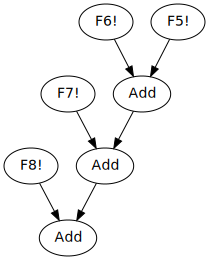

In [7]:
result.get_dag()